In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import json

In [2]:
tn_quake = pd.read_csv("../data/earthquake_tn_01_clean.csv")
tn_quake.shape
tn_quake.head()

,date,latitude,longitude,depth,magnitude,news_source,latest_updated,place,seismic_type,location_error,depth_error,magnitude_error,review_status,year,month,day,time,state,city
0,2020-10-23 04:09:18.260,36.332833,-89.484667,4.93,1.65,nm,2020-10-23T16:52:09.410Z,"5 km SSW of Tiptonville, Tennessee",earthquake,0.33,0.27,0.068,reviewed,2020,10,23,04:09:18.260000,Tennessee,Tiptonville
1,2020-10-21 03:00:08.800,36.313667,-89.536167,9.50,1.23,nm,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,reviewed,2020,10,21,03:00:08.800000,Tennessee,Ridgely
2,2020-10-20 18:50:21.800,36.267500,-89.523333,8.84,2.33,nm,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,reviewed,2020,10,20,18:50:21.800000,Tennessee,Ridgely
3,2020-10-19 20:19:38.490,36.224000,-82.817167,17.27,2.31,se,2020-10-23T06:52:55.336Z,"6 km N of Greeneville, Tennessee",earthquake,0.91,1.69,0.099,reviewed,2020,10,19,20:19:38.490000,Tennessee,Greeneville
4,2020-10-19 05:15:25.090,36.209500,-89.476167,6.33,1.59,nm,2020-10-19T13:03:45.780Z,"6 km S of Ridgely, Tennessee",earthquake,0.26,0.56,0.086,reviewed,2020,10,19,05:15:25.090000,Tennessee,Ridgely


if possible find closest city with a geopandas trick?

## create a map view with folium

In [3]:
center = (35.5175, -86)

In [4]:
map_tn = folium.Map(location = center, zoom_start = 7)
map_tn

## plot seismic events in bubble map

In [5]:
print(tn_quake.dtypes)

date                object
latitude           float64
longitude          float64
depth              float64
magnitude          float64
news_source         object
latest_updated      object
place               object
seismic_type        object
location_error     float64
depth_error        float64
magnitude_error    float64
review_status       object
year                 int64
month                int64
day                  int64
time                object
state               object
city                object
dtype: object


In [6]:
map_tn2 = map_tn
map_tn3 = map_tn
map_tn4 = map_tn
map_tn5 = map_tn
map_tn6 = map_tn
map_tn7 = map_tn
map_tn8 = map_tn

for i in range(0,len(tn_quake)):
   folium.Circle(
      location = [tn_quake.iloc[i]['latitude'], tn_quake.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      #radius = tn_quake.iloc[i]['magnitude']*10000,
      radius = 10000,
      color = 'lightblue',
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'lightblue'
   ).add_to(map_tn2)

map_tn2

In [7]:
tn_quake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4766 non-null   object 
 1   latitude         4766 non-null   float64
 2   longitude        4766 non-null   float64
 3   depth            4760 non-null   float64
 4   magnitude        4764 non-null   float64
 5   news_source      4766 non-null   object 
 6   latest_updated   4766 non-null   object 
 7   place            4766 non-null   object 
 8   seismic_type     4766 non-null   object 
 9   location_error   3569 non-null   float64
 10  depth_error      3568 non-null   float64
 11  magnitude_error  3514 non-null   float64
 12  review_status    4766 non-null   object 
 13  year             4766 non-null   int64  
 14  month            4766 non-null   int64  
 15  day              4766 non-null   int64  
 16  time             4766 non-null   object 
 17  state         

In [8]:
tn_quake_notna = tn_quake[tn_quake['magnitude'].notna()]
tn_quake_notna = tn_quake_notna[tn_quake_notna['year'].notna()]
tn_quake_notna['year'] = tn_quake_notna['year'].astype(float)
tn_quake_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4764 entries, 0 to 4765
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             4764 non-null   object 
 1   latitude         4764 non-null   float64
 2   longitude        4764 non-null   float64
 3   depth            4759 non-null   float64
 4   magnitude        4764 non-null   float64
 5   news_source      4764 non-null   object 
 6   latest_updated   4764 non-null   object 
 7   place            4764 non-null   object 
 8   seismic_type     4764 non-null   object 
 9   location_error   3569 non-null   float64
 10  depth_error      3568 non-null   float64
 11  magnitude_error  3514 non-null   float64
 12  review_status    4764 non-null   object 
 13  year             4764 non-null   float64
 14  month            4764 non-null   int64  
 15  day              4764 non-null   int64  
 16  time             4764 non-null   object 
 17  state         

for i in range(0,len(tn_quake_notna)):
   folium.Circle(
      location = [tn_quake_notna.iloc[i]['latitude'], tn_quake_notna.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = tn_quake_notna.iloc[i]['magnitude']*1000,
      #radius = 10000,
      color = 'lightblue',
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'lightblue'
   ).add_to(map_tn3)

map_tn3

for i in range(0,len(tn_quake_notna)):
   folium.Circle(
      location = [tn_quake_notna.iloc[i]['latitude'], tn_quake_notna.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = tn_quake_notna.iloc[i]['magnitude']*1000,
      #radius = 10000,
      #color = 'lightblue',
      color = tn_quake.iloc[i]['magnitude'], 
      fill = True,
      fill_color = tn_quake.iloc[i]['magnitude'],
   ).add_to(map_tn4)

map_tn4

tn_quake_notna.reset_index()

tn_quake_notna.head()

In [9]:
import matplotlib
import matplotlib.pyplot as plt

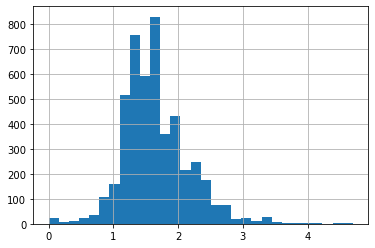

In [10]:
magnitudes = tn_quake_notna['magnitude'].hist(bins=30)

In [11]:
tn_quake_mag3 = tn_quake_notna[tn_quake_notna['magnitude'] > 2.999]
tn_quake_mag3.head()

,date,latitude,longitude,depth,magnitude,news_source,latest_updated,place,seismic_type,location_error,depth_error,magnitude_error,review_status,year,month,day,time,state,city
123,2020-05-10 08:33:14.740,35.140500,-85.891833,8.43,3.13,se,2020-07-29T22:14:27.040Z,"7km SSE of Sewanee, Tennessee",earthquake,0.29,0.57,0.062,reviewed,2020.0,5,10,08:33:14.740000,Tennessee,Sewanee
202,2020-01-20 19:12:11.260,36.430500,-84.026833,34.84,3.80,se,2020-09-02T02:23:04.744Z,"3km ENE of Fincastle, Tennessee",earthquake,0.27,0.37,NaN,reviewed,2020.0,1,20,19:12:11.260000,Tennessee,Fincastle
429,2019-04-24 10:56:54.100,36.135833,-89.439833,14.16,3.69,nm,2020-02-06T02:25:53.977Z,"12km NNW of Dyersburg, Tennessee",earthquake,0.15,0.22,NaN,reviewed,2019.0,4,24,10:56:54.100000,Tennessee,Dyersburg
469,2019-03-05 20:56:02.390,36.295500,-83.735667,17.07,3.37,se,2020-01-23T11:43:13.995Z,"7km NE of Maynardville, Tennessee",earthquake,0.32,0.46,0.195,reviewed,2019.0,3,5,20:56:02.390000,Tennessee,Maynardville
528,2018-12-16 04:12:02.030,36.038333,-83.695500,19.69,3.01,se,2019-03-05T21:06:28.148Z,"5km ESE of Mascot, Tennessee",earthquake,0.29,0.75,0.091,reviewed,2018.0,12,16,04:12:02.030000,Tennessee,Mascot


In [12]:
tn_quake_mag3.shape

(92, 19)

In [13]:
tn_quake_mag3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 123 to 4765
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             92 non-null     object 
 1   latitude         92 non-null     float64
 2   longitude        92 non-null     float64
 3   depth            87 non-null     float64
 4   magnitude        92 non-null     float64
 5   news_source      92 non-null     object 
 6   latest_updated   92 non-null     object 
 7   place            92 non-null     object 
 8   seismic_type     92 non-null     object 
 9   location_error   36 non-null     float64
 10  depth_error      36 non-null     float64
 11  magnitude_error  31 non-null     float64
 12  review_status    92 non-null     object 
 13  year             92 non-null     float64
 14  month            92 non-null     int64  
 15  day              92 non-null     int64  
 16  time             92 non-null     object 
 17  state         

for i in range(0,len(tn_quake_mag3)):
   folium.Circle(
      location = [tn_quake_mag3.iloc[i]['latitude'], tn_quake_mag3.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = tn_quake_mag3.iloc[i]['magnitude']*1000,
      #radius = 10000,
      color = 'lightblue',
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'lightblue'
   ).add_to(map_tn5)

map_tn5

In [14]:
for i in range(0,len(tn_quake_mag3)):
   folium.Circle(
      location = [tn_quake_mag3.iloc[i]['latitude'], tn_quake_mag3.iloc[i]['longitude']],
      #popup = tn_quake.iloc[i]['place'], 
      radius = tn_quake_mag3.iloc[i]['magnitude']*10000,
      #radius = 10000,
      color = 'lightblue',
      #color = tn_quake.iloc[i]['year'], 
      fill = True,
      fill_color = 'lightblue'
   ).add_to(map_tn6)

In [15]:
map_tn6